In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [291]:
#since there are 81 columns , lets display all the columns
pd.pandas.set_option('display.max_columns',None)

In [292]:
dataset=pd.read_csv('train.csv')
dataset.shape

(1460, 81)

In [293]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


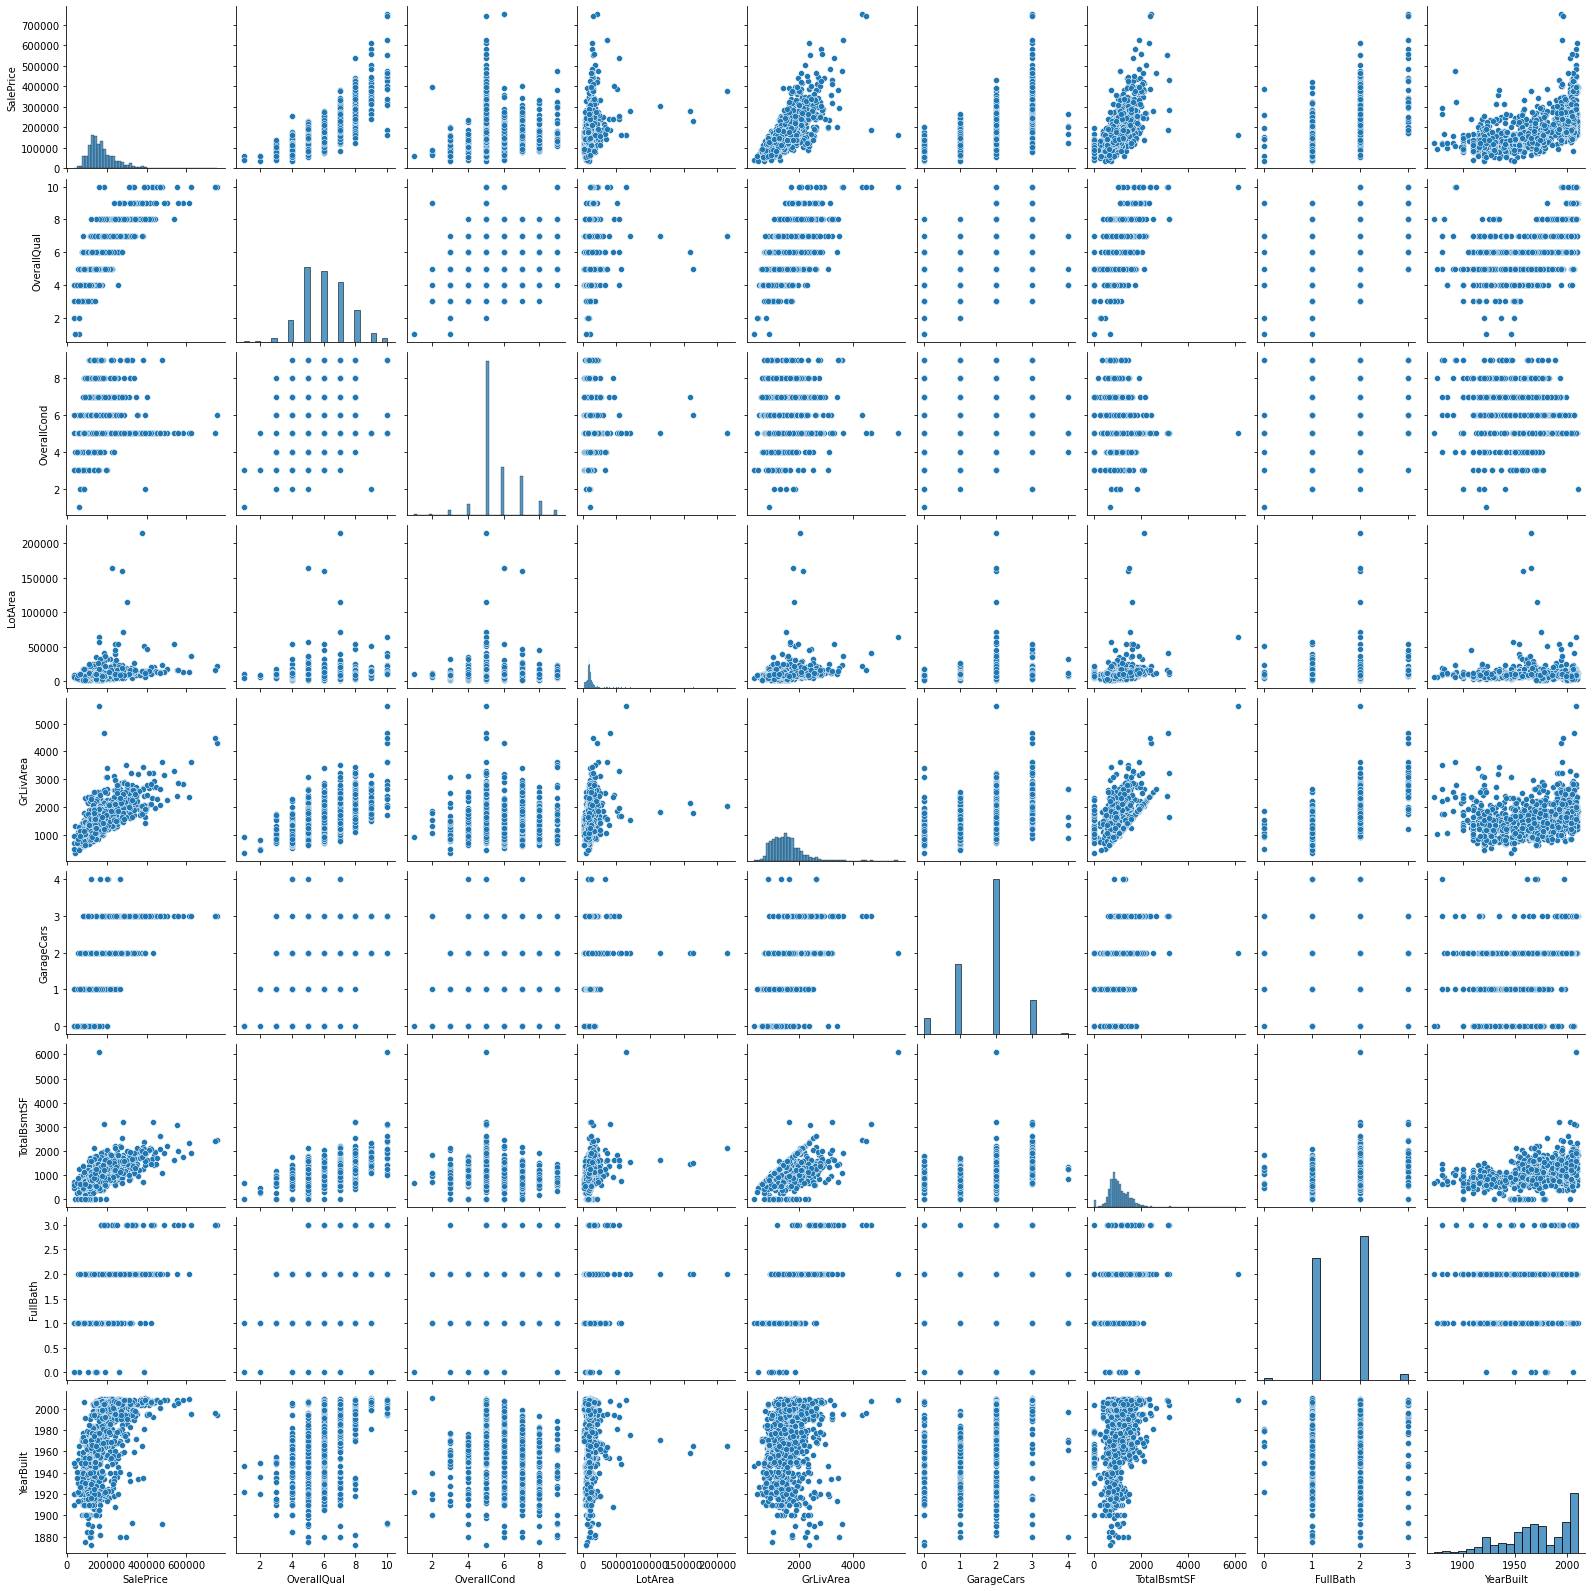

In [294]:
#lets visualise the numeric variables with seaborn plot and observe the behaviour

dataset1 = dataset[['SalePrice', 'OverallQual', 'OverallCond','LotArea','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
sns.pairplot(dataset1)
plt.show()


# Observation
* SalePrice and TotalBsmtSF shows linear relationship
* SalePrice and GrLivArea shows linear relationship
* GrLivArea and TotalBsmtSF shows linear relationship

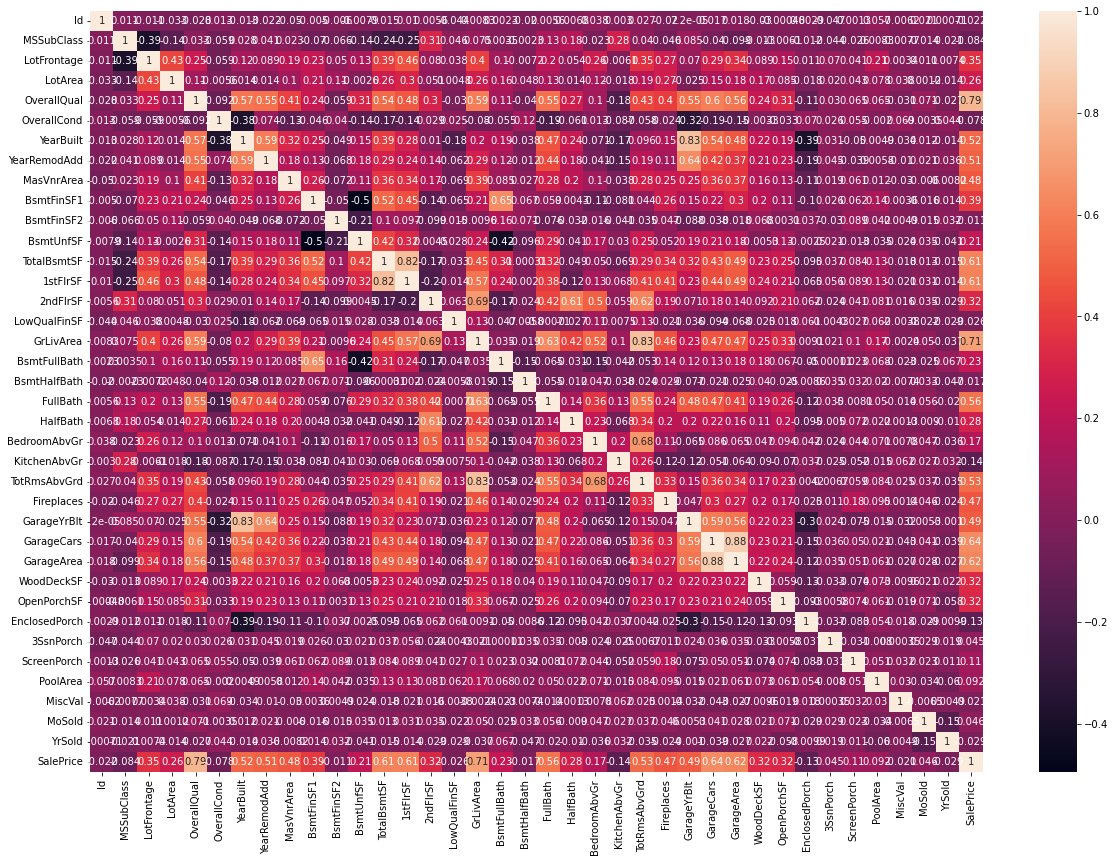

In [295]:
#Plot correlations on heatmap
plt.figure(figsize=(20,14))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

# Observation :
* SalePrice is highly correlated positively with OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, TotalBsmtSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF and OpenPorchSF.
* Saleprice is negatively correlated with KitchenAbvGr and EncosedPorch. So these also can also be good predictors.

# lets perform the below actions :- 
## Missing Values
## Analyse Numerical variables including distribution
## Categorical variables and their cardinality
## outliers

In [296]:
# missing values check, here we will use the check as >1 instead of >0 since "Electrical" column has 1 missing value and
# it can be neglected
missingValues =[missingVals for missingVals in dataset.columns if dataset[missingVals].isna().sum()>1]



In [297]:
# lets compute the missing percentage and count of each column
for missingFeature in missingValues:
    print(missingFeature,np.round(dataset[missingFeature].isna().sum(),4),np.round(dataset[missingFeature].isna().mean(),4))

LotFrontage 259 0.1774
Alley 1369 0.9377
MasVnrType 8 0.0055
MasVnrArea 8 0.0055
BsmtQual 37 0.0253
BsmtCond 37 0.0253
BsmtExposure 38 0.026
BsmtFinType1 37 0.0253
BsmtFinType2 38 0.026
FireplaceQu 690 0.4726
GarageType 81 0.0555
GarageYrBlt 81 0.0555
GarageFinish 81 0.0555
GarageQual 81 0.0555
GarageCond 81 0.0555
PoolQC 1453 0.9952
Fence 1179 0.8075
MiscFeature 1406 0.963


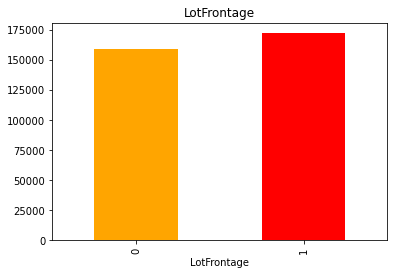

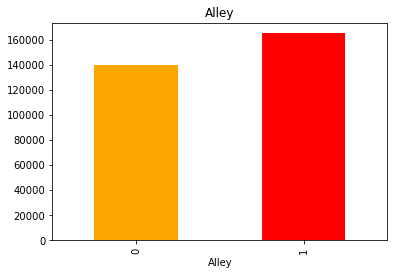

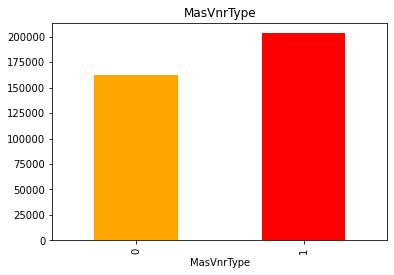

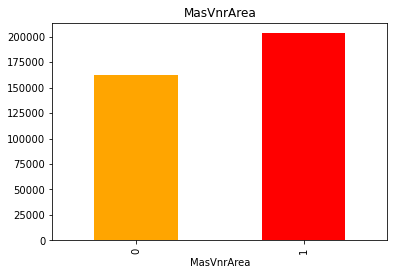

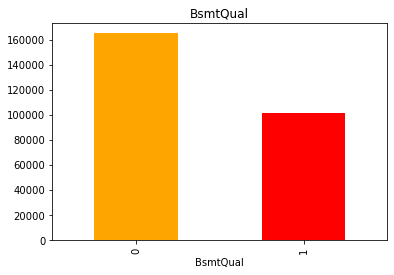

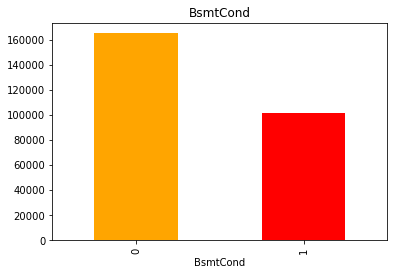

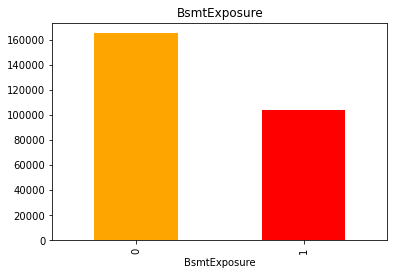

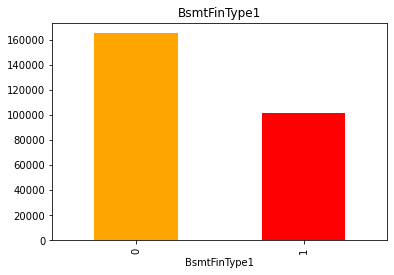

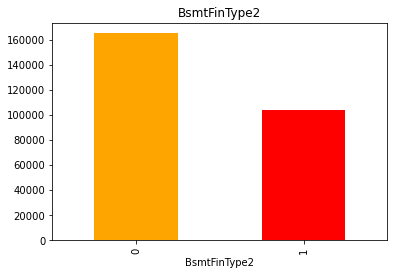

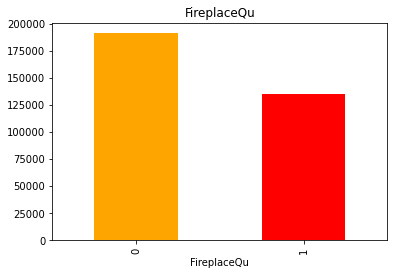

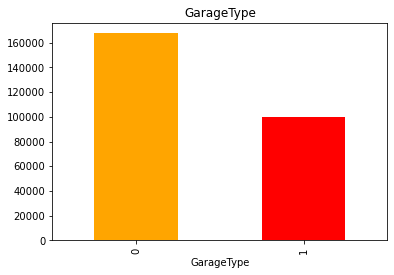

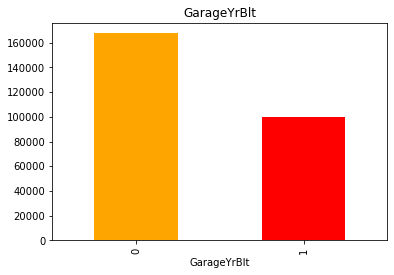

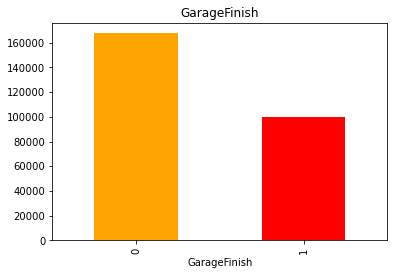

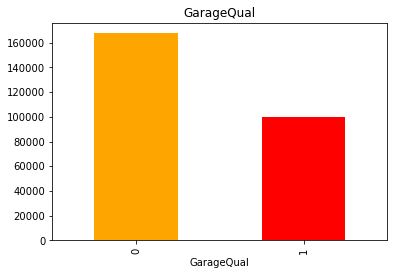

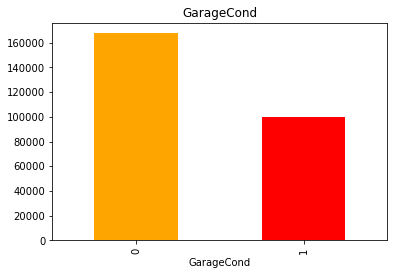

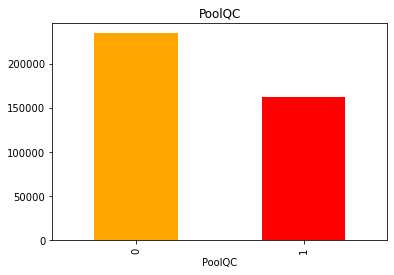

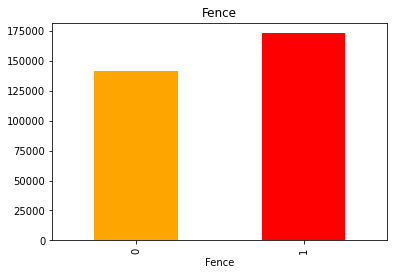

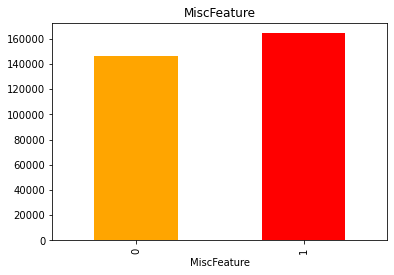

In [298]:
#lets do a count plot for all the missing value columns against the target variable sales price
for missingFeature in missingValues:
    nullBasedData= dataset.copy()
    #when value is absent/null , lets assign the value as 1 and if value is missing we will assign 0
    nullBasedData[missingFeature]=np.where(nullBasedData[missingFeature].isna(),1,0)
    nullBasedData.groupby(missingFeature)['SalePrice'].median().plot.bar(color=['orange','red'])
    plt.title(missingFeature)
    plt.show()
    

# from the above plots , its evident that null values have direct impact on the sales price. Hence we need to replace the null values

In [299]:
#lets find out the no of numerical variables
numericalVariables=[numericalColumns for numericalColumns in dataset.columns if dataset[numericalColumns].dtypes!='O']
#len(numericalVariables),numericalVariables
len(numericalVariables)

38

In [300]:
dataset[numericalVariables].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [301]:
#let us extract some year columns and perform analysis to see if sales price is dependent on the year
yearColumns=[yearBasedColumn for yearBasedColumn in dataset.columns if 'Year' in yearBasedColumn or 'Yr' in yearBasedColumn]
yearColumns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [302]:
def plotYearGraphs(yearColumns):
    for year in yearColumns:
        dataset.groupby(year)['SalePrice'].median().plot()
        plt.xlabel(year)
        plt.ylabel('Median SalePrice')
        plt.title('SalePrice vs ' +year)
        plt.show()

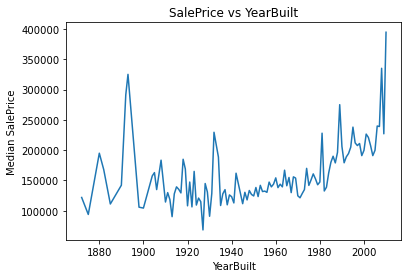

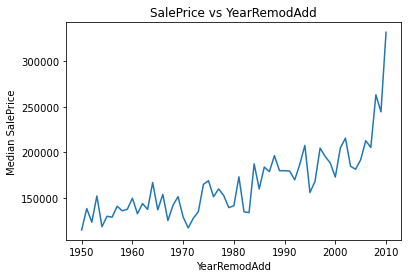

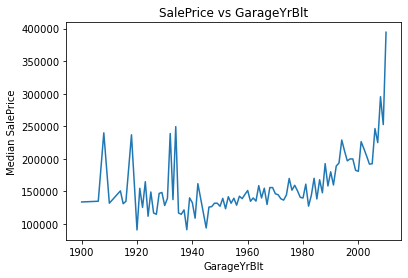

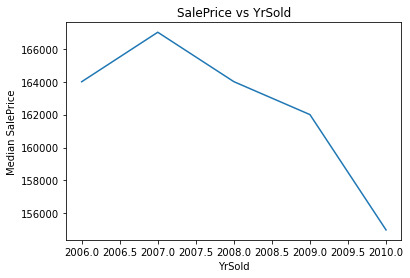

In [303]:
plotYearGraphs(yearColumns)

# Observations of year based plots :
### sale price decreases as the year sold increases
### Garageyearblt  and yearremodelled increased based on year

In [304]:
dataset[yearColumns].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


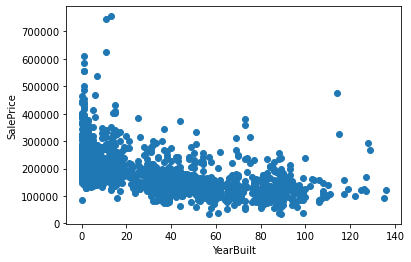

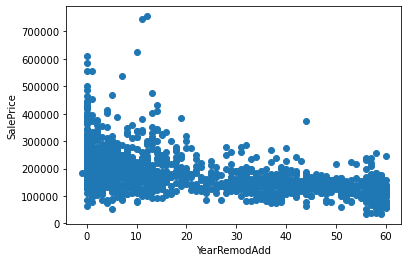

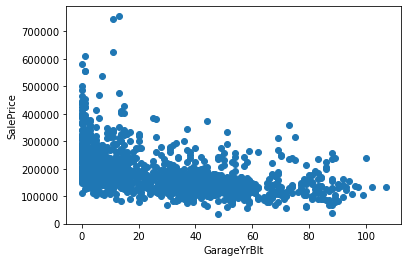

In [305]:
#let us do a scatter plot of sales price against all the other year columns
#we will ignore yearsold column since we already have information of the trend
#We will subtract year sold from the other year column values and do a scatter plot so that we can know the relative year
#value for which the sale price is displayed
for year in yearColumns:
    
    if year!='YrSold':
        data=dataset.copy()
        data[year]=data['YrSold']-data[year]
        plt.scatter(data[year],data['SalePrice'])
        plt.xlabel(year)
        plt.ylabel('SalePrice')
        plt.show()
    

# Observations :
## if the house is new then the sale price increased wrt to YearBuilt,YearRemodAdd,GarageYrBlt columns

In [306]:
#let us get the discrete numerical columns
discreteNumColumns=[discreteCols for discreteCols in numericalVariables if len(dataset[discreteCols].unique())<25 and discreteCols not in yearColumns+['Id']]

In [307]:
len(discreteNumColumns)

17

In [308]:
dataset[discreteNumColumns].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


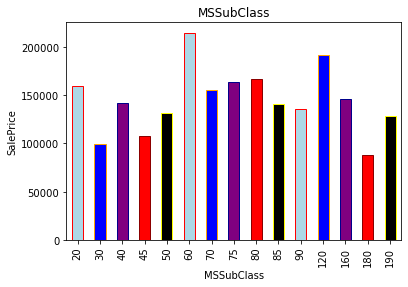

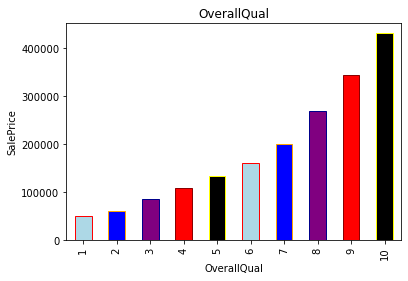

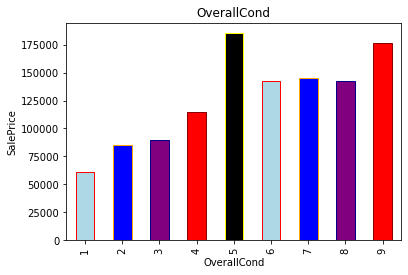

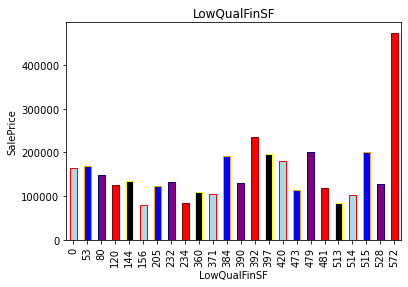

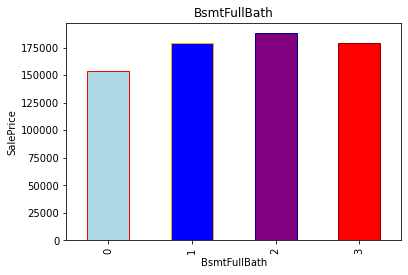

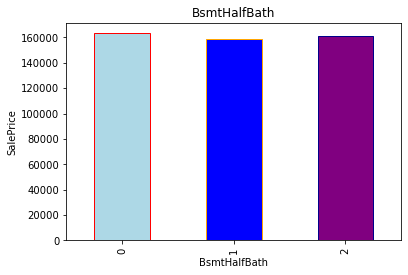

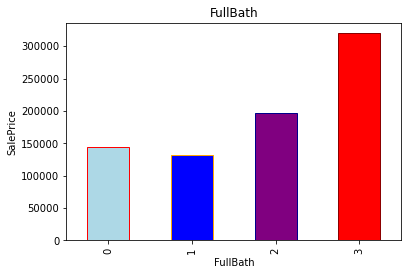

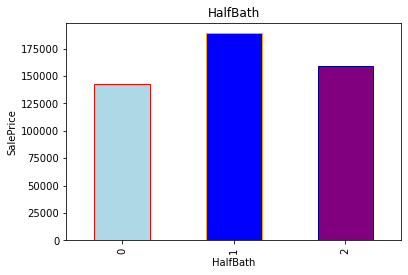

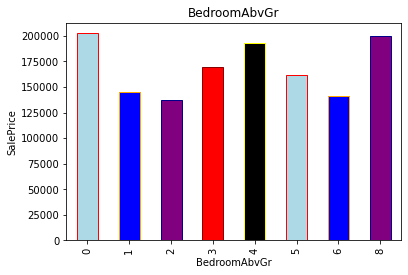

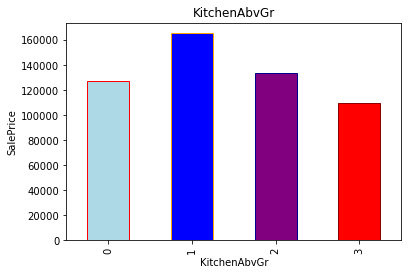

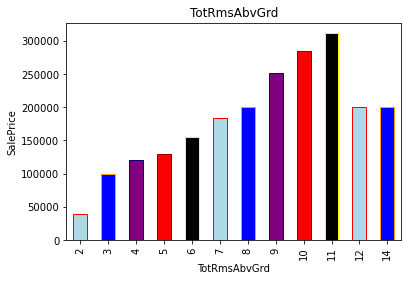

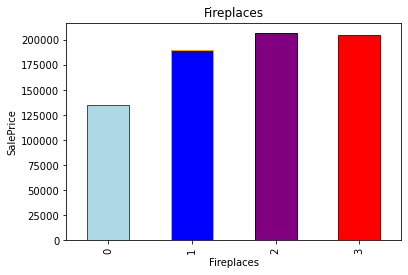

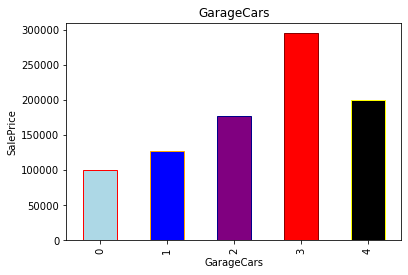

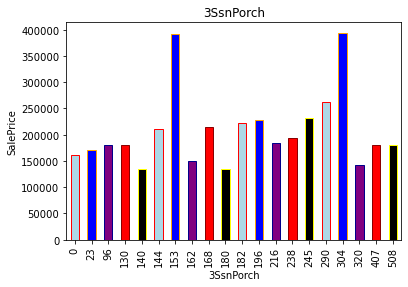

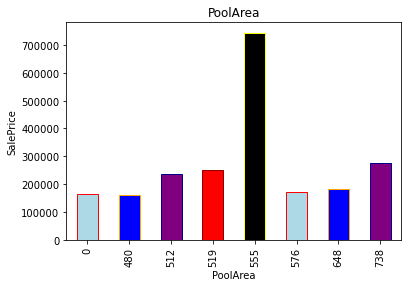

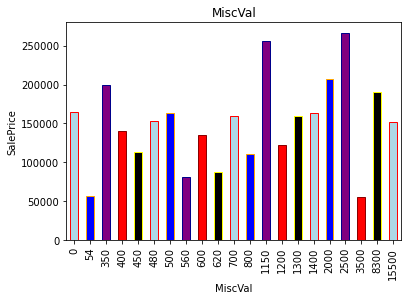

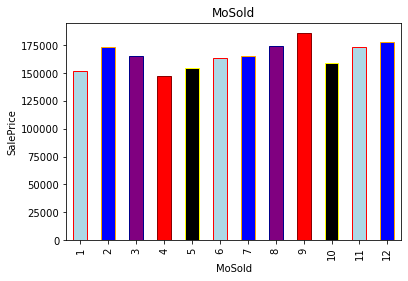

In [309]:
#lets us plot the discrete variables against the sales price
color = ['lightblue', 'blue', 'purple', 'red', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'darkred', 'yellow']
for feature in discreteNumColumns:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=color,edgecolor=edgecolor)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [310]:
#let us get the continous number variables
continousNumColumns=[contNoColumns for contNoColumns in numericalVariables if contNoColumns not in discreteNumColumns+yearColumns+['Id']]

In [311]:
#len(continousNumColumns),continousNumColumns
len(continousNumColumns)

16

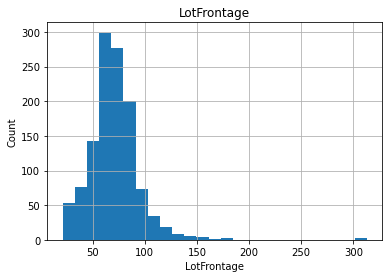

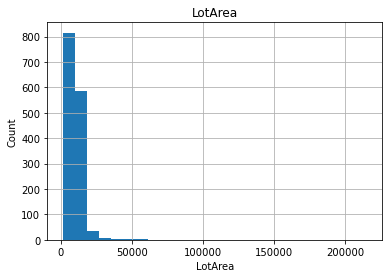

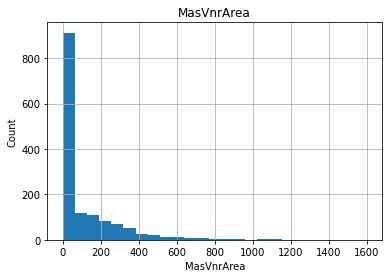

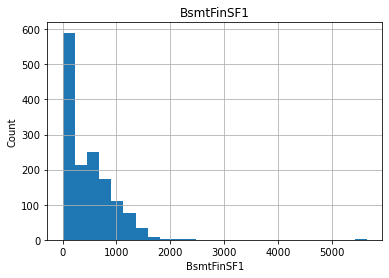

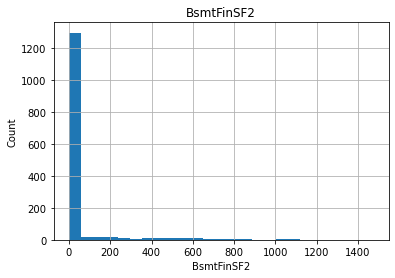

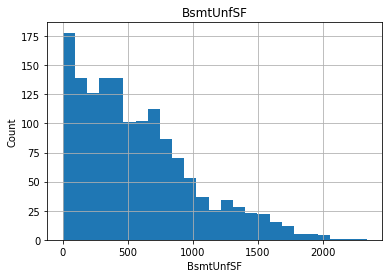

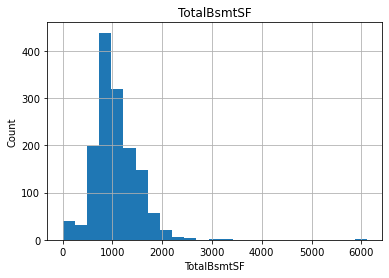

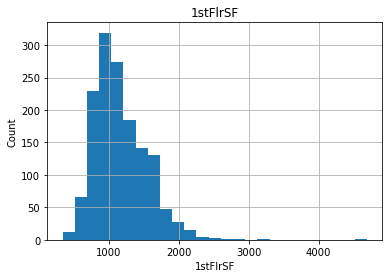

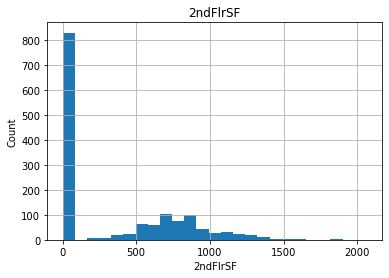

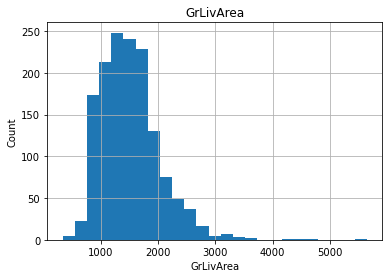

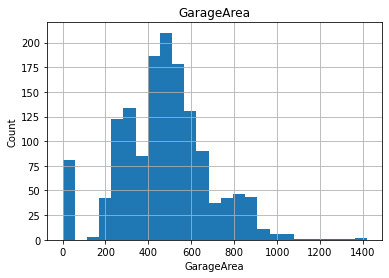

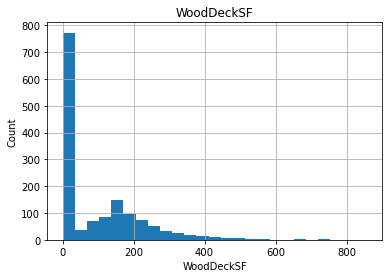

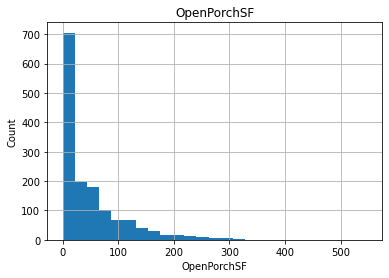

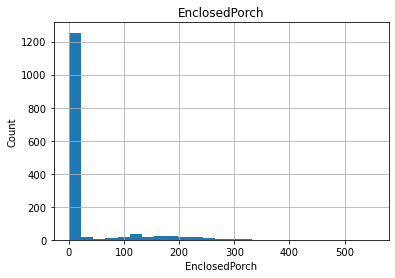

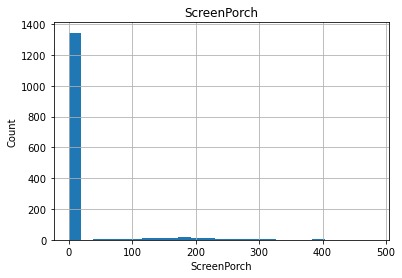

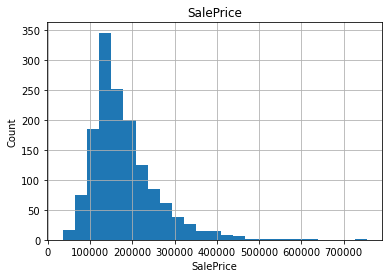

In [312]:
#let us do a histogram plot for continous numerical variables and observe the distribution of data
for column in continousNumColumns:
    data=dataset.copy()
    data[column].hist(bins=25)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.show()

# Observation
## data is skewed for most of the continous variables ,we need to ensure to have gaussian distribution of the data

/Users/vijaythirunavukarasu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


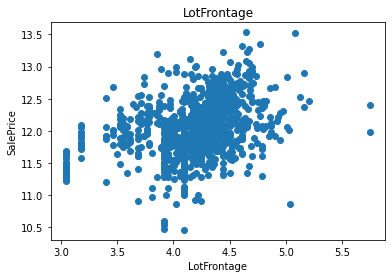

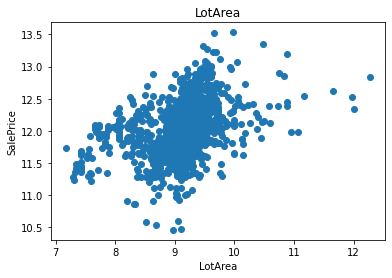

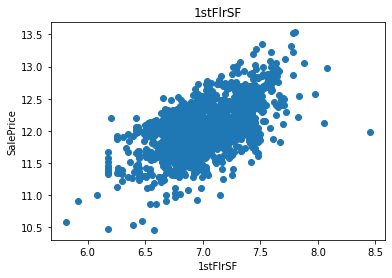

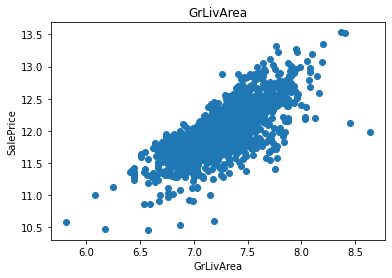

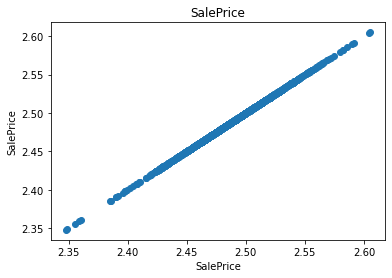

In [313]:
#applying logarithmic transformation on continous distribution variables and then doing a scatter plot,
# to observe the distribution
for feature in continousNumColumns:
    data=dataset.copy();
    if 0 in data[feature].unique():
        #log 0 is undefined , hence we need to skip applying log transformation on such data
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

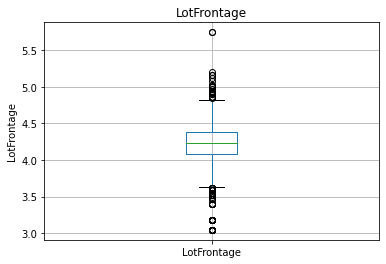

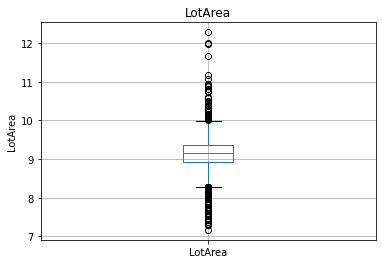

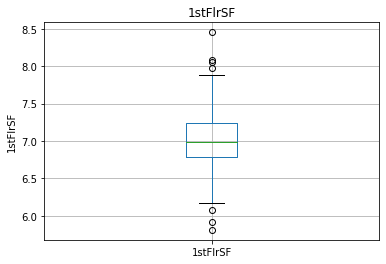

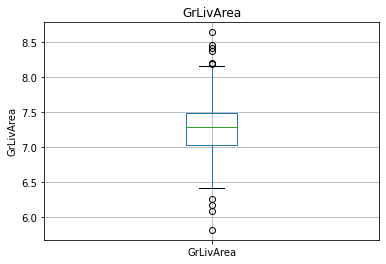

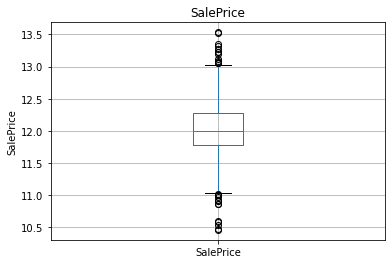

In [314]:
#lets get the outlier values present in the continous distributed numerical variables
for feature in continousNumColumns:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else :
        data[feature]=np.log(data[feature])
        data.boxplot(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Observation :
## there is significant outliers and it needs to be handled

In [315]:
#get categorical variables now
categoricalVariables=[categories for categories in dataset.columns if dataset[categories].dtypes=='O']

In [316]:
#len(categoricalVariables),categoricalVariables
len(categoricalVariables)

43

In [317]:
dataset[categoricalVariables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [318]:
#let us check the distinct values and ordinal values if any for categorical columns
for category in categoricalVariables:
    print("the feature is {} and the number of values are {} of length {}".format(category,dataset[category].unique(),len(dataset[category].unique())))

the feature is MSZoning and the number of values are ['RL' 'RM' 'C (all)' 'FV' 'RH'] of length 5
the feature is Street and the number of values are ['Pave' 'Grvl'] of length 2
the feature is Alley and the number of values are [nan 'Grvl' 'Pave'] of length 3
the feature is LotShape and the number of values are ['Reg' 'IR1' 'IR2' 'IR3'] of length 4
the feature is LandContour and the number of values are ['Lvl' 'Bnk' 'Low' 'HLS'] of length 4
the feature is Utilities and the number of values are ['AllPub' 'NoSeWa'] of length 2
the feature is LotConfig and the number of values are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] of length 5
the feature is LandSlope and the number of values are ['Gtl' 'Mod' 'Sev'] of length 3
the feature is Neighborhood and the number of values are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'B

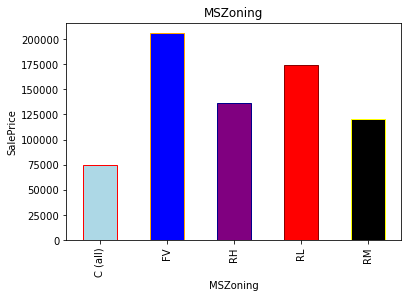

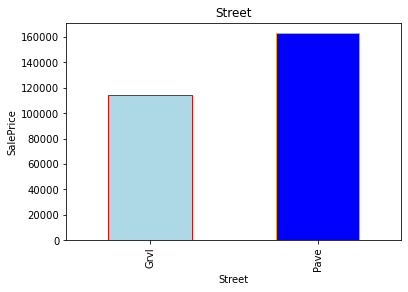

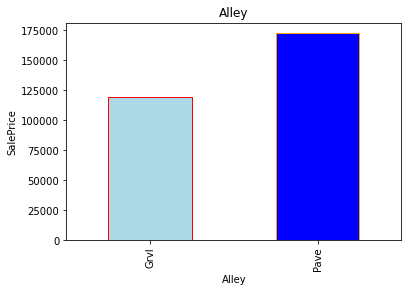

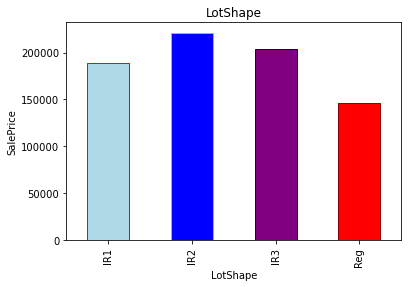

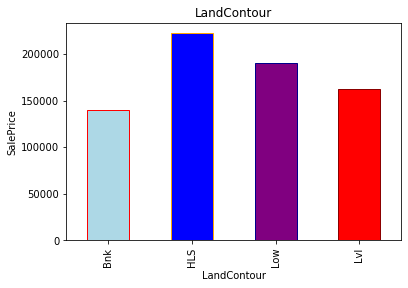

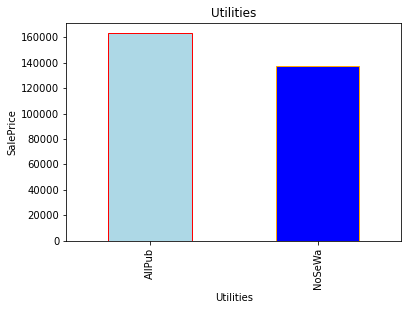

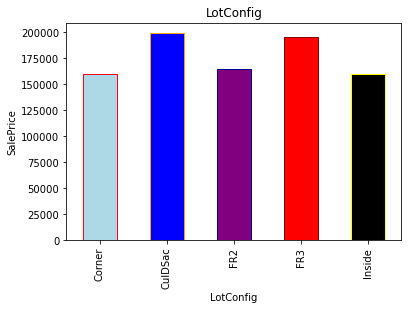

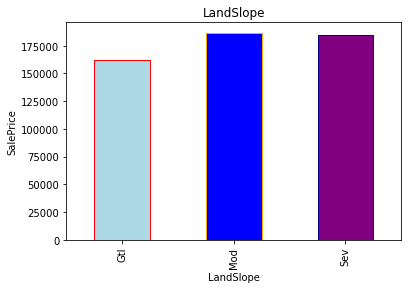

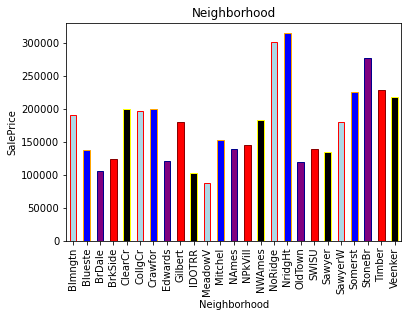

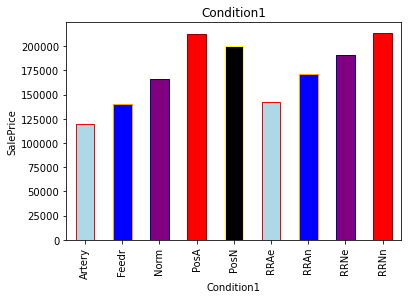

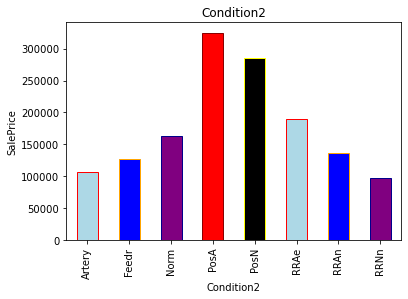

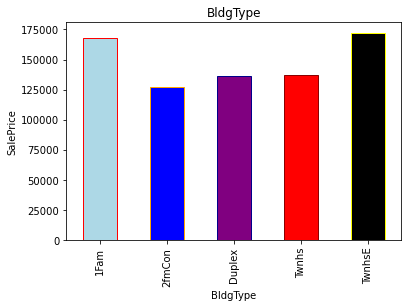

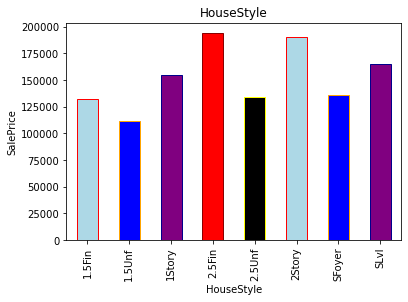

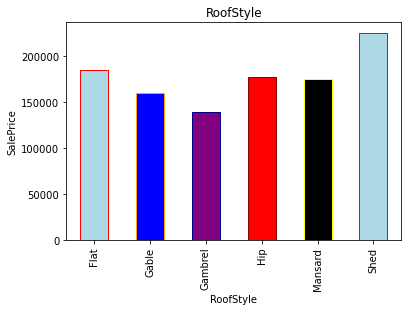

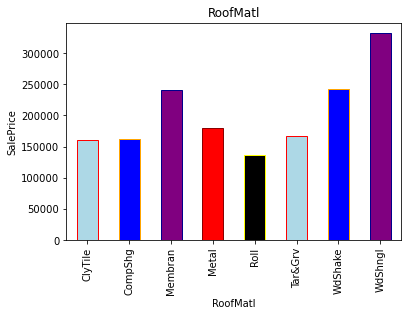

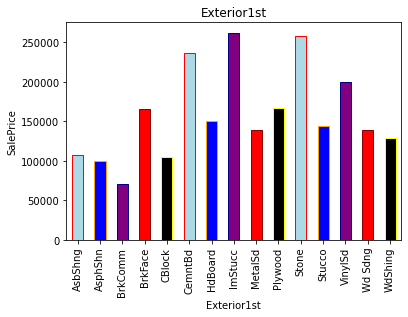

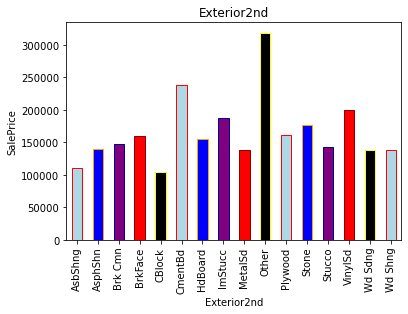

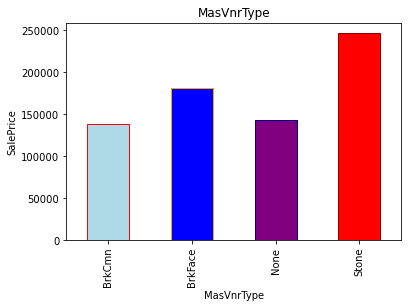

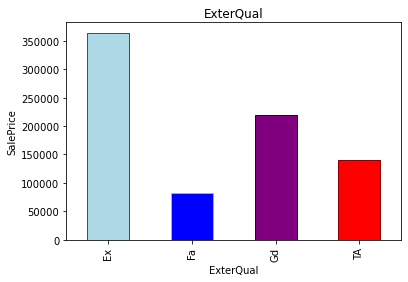

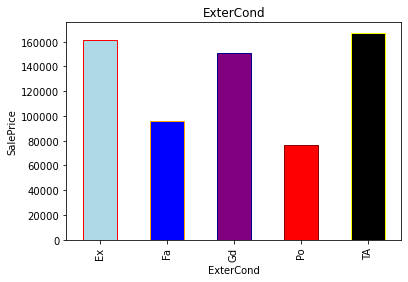

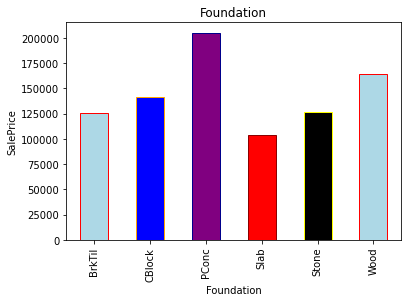

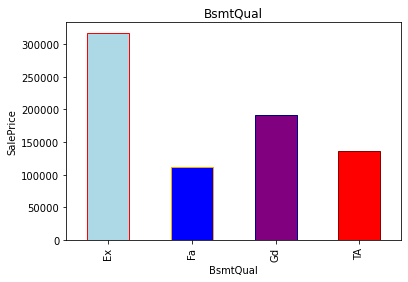

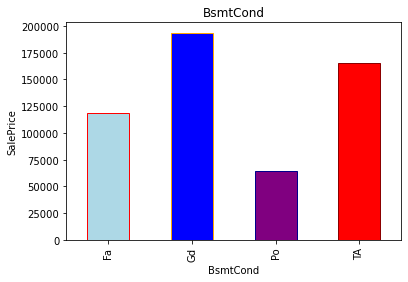

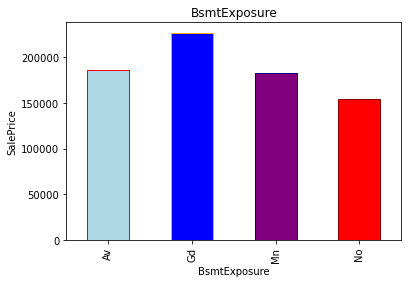

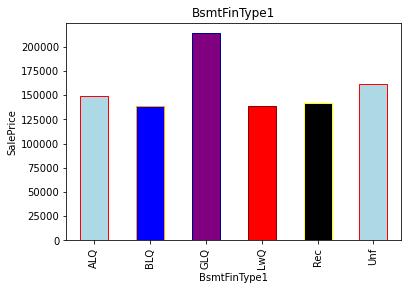

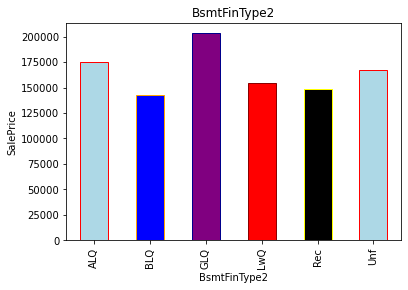

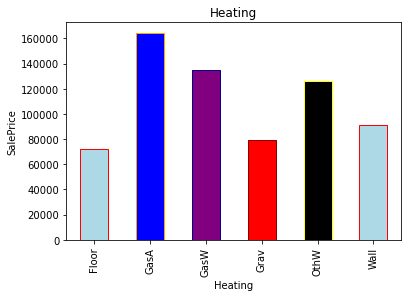

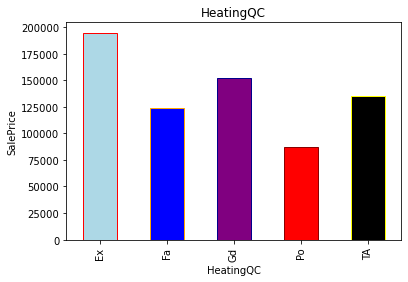

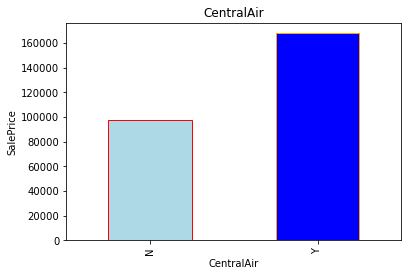

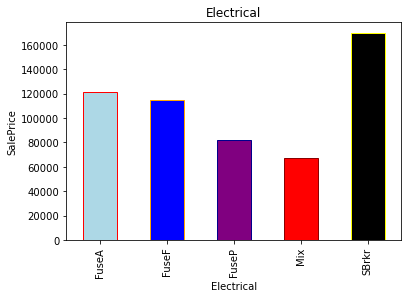

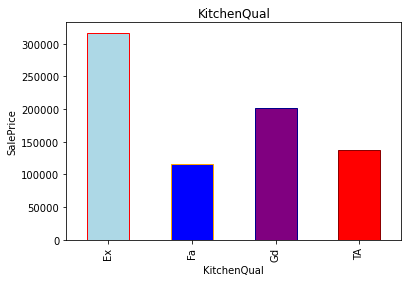

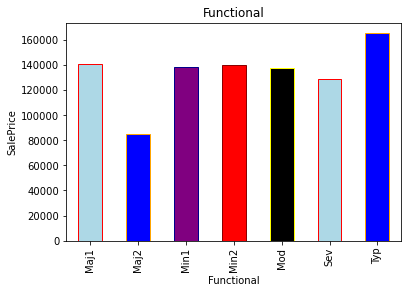

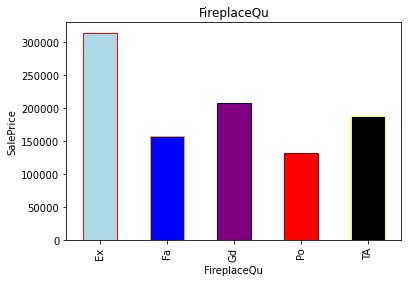

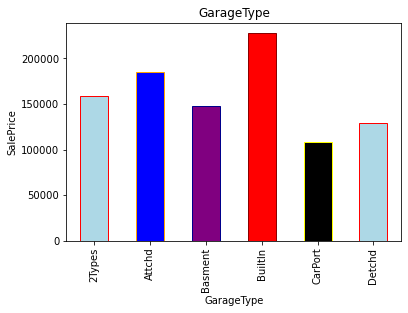

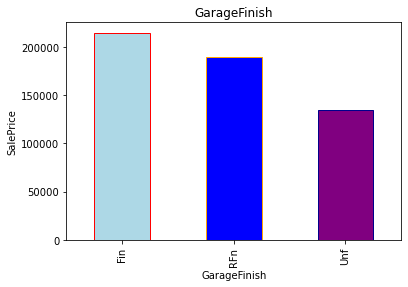

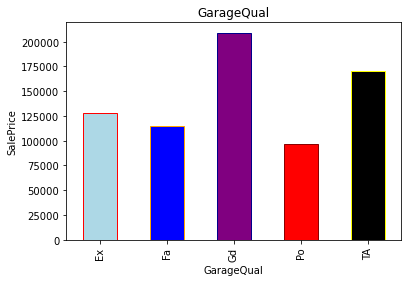

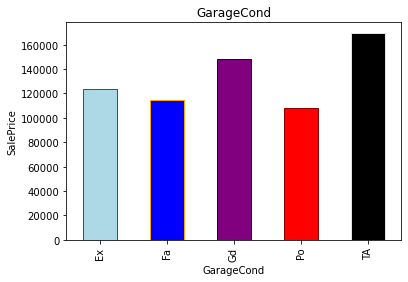

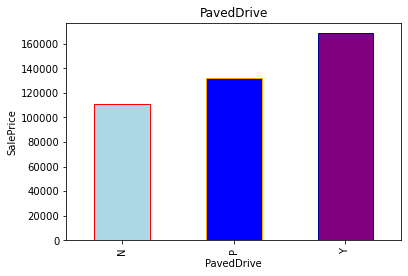

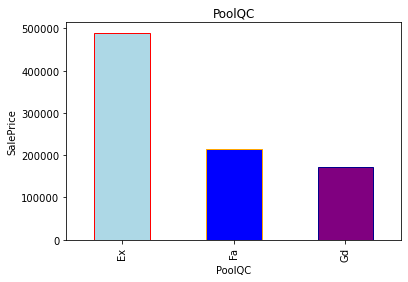

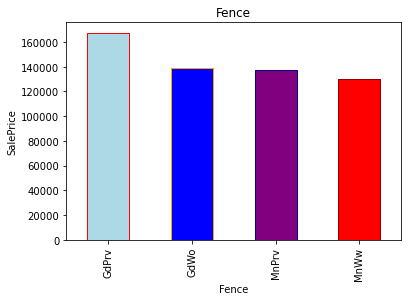

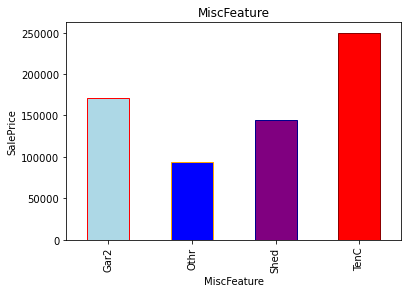

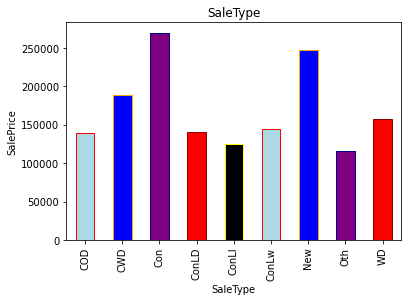

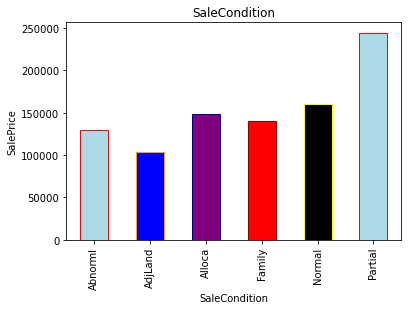

In [319]:
#let us find the relationship between categorical variables and saleprice
color = ['lightblue', 'blue', 'purple', 'red', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'darkred', 'yellow']
for feature in categoricalVariables:
    data=dataset.copy()
    # we will use median instead of mean since there are outliers in the data
    data.groupby(feature)['SalePrice'].median().plot.bar(color=color,edgecolor=edgecolor)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [320]:
#handling missing values for categorical variables :
categoricalFeatureNanValues=[features for features in dataset.columns if dataset[features].isna().sum()>1 and dataset[features].dtypes=='O']
for nanfeature in categoricalFeatureNanValues:
    print("feature is {} and {}% is the missing value".format(nanfeature,np.round(dataset[nanfeature].isna().mean(),4)))

feature is Alley and 0.9377% is the missing value
feature is MasVnrType and 0.0055% is the missing value
feature is BsmtQual and 0.0253% is the missing value
feature is BsmtCond and 0.0253% is the missing value
feature is BsmtExposure and 0.026% is the missing value
feature is BsmtFinType1 and 0.0253% is the missing value
feature is BsmtFinType2 and 0.026% is the missing value
feature is FireplaceQu and 0.4726% is the missing value
feature is GarageType and 0.0555% is the missing value
feature is GarageFinish and 0.0555% is the missing value
feature is GarageQual and 0.0555% is the missing value
feature is GarageCond and 0.0555% is the missing value
feature is PoolQC and 0.9952% is the missing value
feature is Fence and 0.8075% is the missing value
feature is MiscFeature and 0.963% is the missing value


In [321]:
len(categoricalFeatureNanValues)

15

In [322]:
def replaceCategoryFeatureMissingValues(dataset,categoricalFeatureNanValues):
    data=dataset.copy()
    data[categoricalFeatureNanValues]=data[categoricalFeatureNanValues].fillna('Missing')
    return data
dataset=replaceCategoryFeatureMissingValues(dataset,categoricalFeatureNanValues)
dataset[categoricalFeatureNanValues].isna().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [323]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [324]:
numericalNanValues=[noNanValues for noNanValues in dataset.columns if dataset[noNanValues].isnull().sum()>1 and dataset[noNanValues].dtypes!='O']
for value in numericalNanValues:
    print("feature {} has {}% of missing values ".format(value,np.round(dataset[value].isnull().mean(),4)))


feature LotFrontage has 0.1774% of missing values 
feature MasVnrArea has 0.0055% of missing values 
feature GarageYrBlt has 0.0555% of missing values 


In [325]:
#for numerical data there are outliers , so we will use median to replace the missing value
for feature in numericalNanValues:
    median_data=dataset[feature].median()
    
    dataset[feature+'Nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_data,inplace=True)
dataset[numericalNanValues].isnull().sum()
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [326]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [327]:
# let us replace the year variables too 
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feature]=dataset['YrSold']-dataset[feature]
    

In [328]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [329]:
dataset[continousNumColumns].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


In [330]:
#before doing scaling for continous numerical variables , lets ignore those columns which have 0 values
columnsWithZeros=[fea for fea in continousNumColumns if np.isclose(dataset[fea], 0).any()]
columnsWithZeros

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [331]:
#once we have the numerical columns which has 0 values , we can subtract them from the total numerical columns
list(set(continousNumColumns)-set(columnsWithZeros))

['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', '1stFlrSF']

In [332]:
num_features=['LotArea', 'SalePrice', 'GrLivArea', '1stFlrSF', 'LotFrontage']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [333]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


# handling categorical data

In [334]:
for feature in categoricalVariables:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')


In [335]:
dataset.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,6.

In [336]:
for feature in categoricalVariables:
    labelsOrdered=dataset.groupby(feature)['SalePrice'].mean().sort_values().index
    #print(labelsOrdered," loop done ",feature)
    labelsOrdered={k:i for i,k in enumerate(labelsOrdered,0)}
    #print(labelsOrdered,"loop complete")
    dataset[feature]=dataset[feature].map(labelsOrdered)

In [337]:
dataset.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,0,0,9,2,1,3,1,5,5,16,14,0,0,10,10,1,0.0,1,3,3,3,3,1,6,732,5,0,64,796,2,4,1,3,6.679599,566,0,7.216709,1,0,1,1,1,1,1,5,4,0,1,4,16.0,1,2,480,2,3,2,40,30,0,320,0,0,0,2,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,0,0,18,2,1,3,3,8,5,3,2,0,0,10,10,4,186.0,2,3,4,4,3,3,6,1369,5,0,317,1686,2,4,1,3,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,4,1,4,4,3.0,2,2,636,2,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,1,0,12,5,1,3,5,7,6,36,36,0,0,6,5,4,240.0,1,3,2,3,3,2,4,859,1,32,216,1107,2,4,1,3,7.009409,983,0,7.644919,1,0,2,1,3,1,1,7,4,2,3,4,36.0,2,2,484,2,3,2,235,204,228,0,0,0,0,4,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,0,0,4,0,1,3,1,7,5,77,58,0,0,8,4,1,0.0,1,3,1,2,3,1,5,0,5,0,952,952,2,3,1,1,6.929517,752,0,7.480992,0,0,2,0,2,2,1,8,3,2,3,2,77.0,1,2,468,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,1,0,3,0,0,0,2,5,6,69,58,0,0,4,3,1,0.0,1,3,1,2,3,1,6,851,5,0,140,991,2,4,1,3,6.981935,0,0,6.981935,1,0,1,0,2,2,1,5,4,2,3,4,69.0,2,1,205,3,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,3,11.678440,0,0,0


In [338]:
dataset.shape

(1460, 84)

In [339]:
y=dataset.pop('SalePrice')
X=dataset

In [340]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [341]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,0,0,0


In [342]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [343]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((978, 83), (482, 83), (978,), (482,))

In [344]:
#lets do feature scaling now
featuresToScale=[features for features in dataset.columns if features not in ['Id','SalePrice']] 
#len(featuresToScale)
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_train[featuresToScale] = scaler.fit_transform(X_train[featuresToScale])
X_test[featuresToScale] = scaler.transform(X_test[featuresToScale])

In [345]:
X_train=X_train[featuresToScale]
X_test=X_test[featuresToScale]

In [346]:

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [347]:
from sklearn.metrics import r2_score, mean_squared_error

# Applying Ridge regularisation

In [348]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [349]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [350]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.9}
-0.09117381944995712


In [351]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003626,0.000777,0.002181,0.000254,0.0001,{'alpha': 0.0001},-0.092857,-0.094897,-0.087813,-0.094611,-0.122290,-0.098493,0.012166,23,-0.076829,-0.076131,-0.078874,-0.079042,-0.078325,-0.077840,0.001157
1,0.003964,0.000487,0.002458,0.000329,0.001,{'alpha': 0.001},-0.092845,-0.094942,-0.087843,-0.094537,-0.091397,-0.092313,0.002568,14,-0.076817,-0.076137,-0.078871,-0.079069,-0.080010,-0.078181,0.001460
2,0.005063,0.001096,0.002931,0.000262,0.01,{'alpha': 0.01},-0.092818,-0.095271,-0.088117,-0.093997,-0.087977,-0.091636,0.003032,8,-0.076876,-0.076275,-0.078982,-0.079537,-0.081215,-0.078577,0.001802
3,0.004369,0.000417,0.002682,0.000224,0.05,{'alpha': 0.05},-0.092712,-0.095681,-0.089008,-0.093463,-0.089897,-0.092152,0.002427,13,-0.077646,-0.076544,-0.079670,-0.080729,-0.081342,-0.079186,0.001823
4,0.004726,0.000208,0.002643,0.000175,0.1,{'alpha': 0.1},-0.092388,-0.095642,-0.089523,-0.093157,-0.089900,-0.092122,0.002246,12,-0.078075,-0.076671,-0.079981,-0.081230,-0.081368,-0.079465,0.001830
5,0.004424,0.000202,0.002840,0.000348,0.2,{'alpha': 0.2},-0.091927,-0.095365,-0.089858,-0.092780,-0.089548,-0.091895,0.002121,11,-0.078408,-0.076794,-0.080232,-0.081626,-0.081449,-0.079702,0.001853
6,0.004569,0.000393,0.002798,0.000217,0.3,{'alpha': 0.3},-0.091610,-0.095103,-0.089968,-0.092525,-0.089158,-0.091673,0.002085,9,-0.078546,-0.076890,-0.080388,-0.081826,-0.081600,-0.079850,0.001883
7,0.004698,0.000126,0.002745,0.000106,0.4,{'alpha': 0.4},-0.091333,-0.094919,-0.090080,-0.092336,-0.088840,-0.091502,0.002074,7,-0.078675,-0.077018,-0.080515,-0.081990,-0.081764,-0.079992,0.001897
8,0.004328,0.000262,0.002690,0.000206,0.5,{'alpha': 0.5},-0.091100,-0.094806,-0.090183,-0.092185,-0.088572,-0.091369,0.002087,6,-0.078803,-0.077144,-0.080651,-0.082162,-0.081950,-0.080142,0.001918
9,0.006130,0.002384,0.003336,0.000807,0.6,{'alpha': 0.6},-0.090978,-0.094702,-0.090318,-0.092101,-0.088334,-0.091287,0.002101,5,-0.078936,-0.077281,-0.080793,-0.082340,-0.082154,-0.080301,0.001940


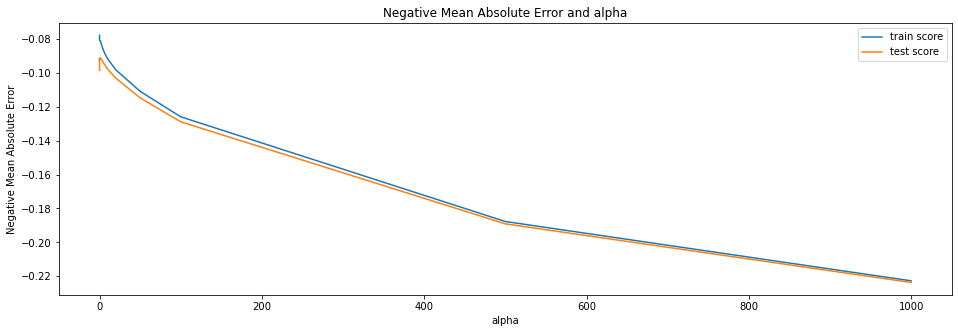

In [352]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

# optimum value for alpha is 0.9

In [353]:
alpha = 0.9
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-6.53114901e-02,  7.40141600e-02, -3.81026778e-02,  2.13877001e-01,
        8.79829450e-02, -8.75320524e-03, -2.27707653e-03,  1.01848891e-01,
        1.62185165e-01,  2.82342767e-02,  1.56846778e-02,  1.98411089e-01,
        6.07726965e-02,  1.23557234e-01, -1.15179964e-02, -3.68966070e-02,
        4.43901725e-01,  2.40735377e-01, -1.07228467e-01, -3.96525052e-02,
        1.35384911e-02, -2.69325673e-02,  9.77405604e-02, -7.76052913e-02,
        1.50636944e-02, -1.00576435e-02,  5.18080275e-02,  1.44337565e-02,
        4.12495767e-02,  1.14475370e-01,  2.19659129e-02,  5.48333366e-02,
       -5.20125524e-03,  1.00970617e-02,  2.86417929e-02,  2.62727908e-02,
       -7.75759709e-02, -1.54861238e-02,  4.67478429e-02,  3.78412416e-02,
        3.78984263e-02, -9.43050679e-03,  4.85776815e-01,  1.14359840e-01,
        1.18995979e-01,  5.16185388e-01,  1.33077833e-01,  1.21405816e-02,
        8.31362163e-02,  6.81714033e-02,  2.82545705e-02, -8.34721106e-02,
        8.99269715e-02,  

In [354]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [355]:
print('R2 score for training data is ',r2_score(y_train, y_pred_train))
print('R2 score for testing data is ',r2_score(y_test, y_pred_test))

R2 score for training data is  0.9100360484357475
R2 score for testing data is  0.900429161191888


In [356]:
print("rss for training data is ",np.sum(np.square(y_train-y_pred_train)))
print("rss for testing data is ",np.sum(np.square(y_test-y_pred_test)))

rss for training data is  13.54829838662586
rss for testing data is  8.179537973618235


In [357]:
print("MSE for training data is ",mean_squared_error(y_train,y_pred_train))
print("MSE for testing data is ",mean_squared_error(y_test,y_pred_test))

MSE for training data is  0.013853065834995766
MSE for testing data is  0.016969995795888454


# Applying lasso regularisation

In [358]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [359]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.09102774915159165


In [360]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009553,0.001705,0.002474,0.000300,0.0001,{'alpha': 0.0001},-0.089677,-0.094817,-0.088432,-0.092880,-0.089334,-0.091028,0.002417,1,-0.078092,-0.077623,-0.080145,-0.080486,-0.081651,-0.079599,0.001515
1,0.005423,0.000428,0.002271,0.000177,0.001,{'alpha': 0.001},-0.092288,-0.094764,-0.093096,-0.093626,-0.085231,-0.091801,0.003382,2,-0.084311,-0.082277,-0.087474,-0.086867,-0.087956,-0.085777,0.002155
2,0.003383,0.000603,0.001844,0.000325,0.01,{'alpha': 0.01},-0.128596,-0.136891,-0.149414,-0.124209,-0.118970,-0.131616,0.010663,3,-0.129227,-0.125117,-0.128897,-0.131862,-0.130805,-0.129182,0.002299
3,0.003917,0.000390,0.002330,0.000474,0.05,{'alpha': 0.05},-0.245090,-0.232308,-0.284984,-0.223372,-0.216927,-0.240536,0.024150,4,-0.239950,-0.239480,-0.237868,-0.239135,-0.240951,-0.239477,0.001010
4,0.003150,0.000281,0.001969,0.000099,0.1,{'alpha': 0.1},-0.303044,-0.299827,-0.350210,-0.294139,-0.282809,-0.306006,0.023151,5,-0.306203,-0.307373,-0.295191,-0.308764,-0.311364,-0.305779,0.005566
5,0.002691,0.000208,0.001650,0.000194,0.2,{'alpha': 0.2},-0.303044,-0.299827,-0.350210,-0.294139,-0.282809,-0.306006,0.023151,5,-0.306203,-0.307373,-0.295191,-0.308764,-0.311364,-0.305779,0.005566
6,0.002811,0.000443,0.002085,0.000429,0.3,{'alpha': 0.3},-0.303044,-0.299827,-0.350210,-0.294139,-0.282809,-0.306006,0.023151,5,-0.306203,-0.307373,-0.295191,-0.308764,-0.311364,-0.305779,0.005566
7,0.003369,0.000414,0.001959,0.000052,0.4,{'alpha': 0.4},-0.303044,-0.299827,-0.350210,-0.294139,-0.282809,-0.306006,0.023151,5,-0.306203,-0.307373,-0.295191,-0.308764,-0.311364,-0.305779,0.005566
8,0.003063,0.000384,0.001987,0.000182,0.5,{'alpha': 0.5},-0.303044,-0.299827,-0.350210,-0.294139,-0.282809,-0.306006,0.023151,5,-0.306203,-0.307373,-0.295191,-0.308764,-0.311364,-0.305779,0.005566
9,0.003051,0.000222,0.001986,0.000203,0.6,{'alpha': 0.6},-0.303044,-0.299827,-0.350210,-0.294139,-0.282809,-0.306006,0.023151,5,-0.306203,-0.307373,-0.295191,-0.308764,-0.311364,-0.305779,0.005566


# optimum value for lasso is 0.0001

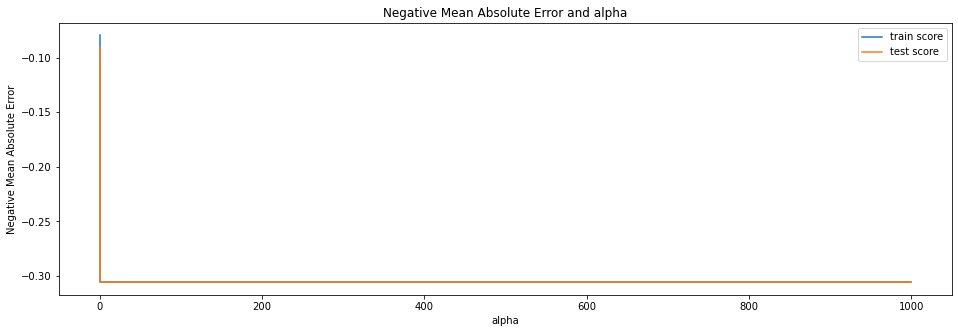

In [361]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [362]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.06347853,  0.0788289 , -0.03353792,  0.22936192,  0.07064801,
       -0.00259095, -0.        ,  0.10149732,  0.21378244,  0.02401983,
        0.00723987,  0.18655826,  0.05489145,  0.13232993, -0.00390808,
       -0.02786042,  0.47066638,  0.25789037, -0.12773774, -0.03336912,
        0.00968873, -0.02963794,  0.10053336, -0.07789655,  0.01008329,
       -0.        ,  0.03845251,  0.01036615,  0.03747525,  0.11219237,
        0.01936779,  0.05154286, -0.00157617, -0.        ,  0.02747361,
        0.01391754, -0.09779147, -0.        ,  0.04315584,  0.03769979,
        0.03356974, -0.00608213,  0.43563845,  0.06522999,  0.10969269,
        0.79721518,  0.12544069,  0.00808566,  0.0518916 ,  0.05120981,
        0.        , -0.08194156,  0.08607268,  0.02260549,  0.13353107,
        0.04247225,  0.04114091, -0.00810526,  0.04710925,  0.        ,
        0.19301699,  0.02105509,  0.14381189, -0.        ,  0.01704093,
        0.07024788, -0.00760008,  0.09296627,  0.05874268,  0.17

In [363]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [364]:
print('R2 score for training data is ',r2_score(y_train, y_pred_train))
print('R2 score for testing data is ',r2_score(y_test, y_pred_test))

R2 score for training data is  0.9123366601003922
R2 score for testing data is  0.9002804749253401


In [365]:
print("rss for training data is ",np.sum(np.square(y_train-y_pred_train)))
print("rss for testing data is ",np.sum(np.square(y_test-y_pred_test)))

rss for training data is  13.201833244061532
rss for testing data is  8.191752242152486


In [366]:
print("MSE for training data is ",mean_squared_error(y_train,y_pred_train))
print("MSE for testing data is ",mean_squared_error(y_test,y_pred_test))

MSE for training data is  0.013498806998017927
MSE for testing data is  0.01699533660197611


# Model Evaluation

In [367]:
ridge_pred = ridge.predict(X_test)

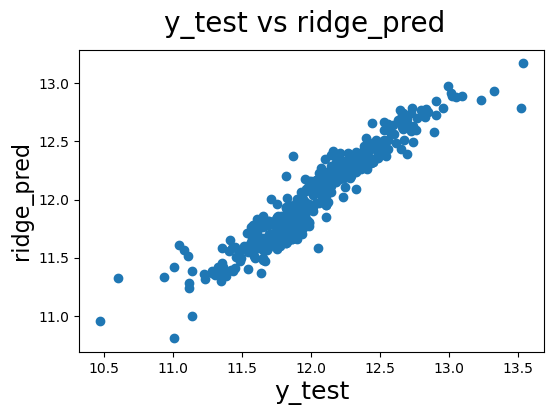

In [368]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

/Users/vijaythirunavukarasu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


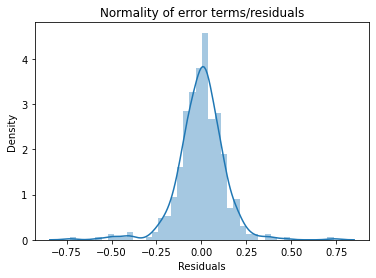

In [369]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [370]:
lasso_pred = lasso.predict(X_test)

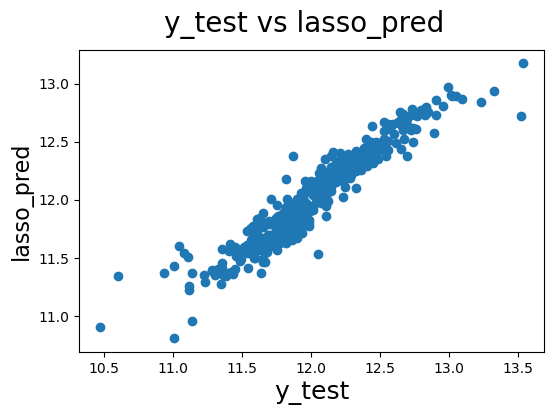

In [371]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

/Users/vijaythirunavukarasu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


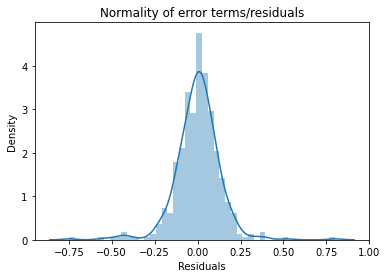

In [372]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [373]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['abs_value_coeff']= abs (betas['Lasso'])
sorted_coef_df = betas.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df)


                   Ridge     Lasso  abs_value_coeff
GrLivArea       0.516185  0.797215         0.797215
PoolQC         -0.289189 -0.787223         0.787223
PoolArea        0.017193  0.597637         0.597637
OverallQual     0.443902  0.470666         0.470666
1stFlrSF        0.485777  0.435638         0.435638
OverallCond     0.240735  0.257890         0.257890
LotArea         0.213877  0.229362         0.229362
Utilities       0.162185  0.213782         0.213782
GarageCars      0.182466  0.193017         0.193017
Neighborhood    0.198411  0.186558         0.186558
ScreenPorch     0.166865  0.175464         0.175464
GarageQual      0.151154  0.143812         0.143812
Functional      0.125133  0.133531         0.133531
Condition2      0.123557  0.132330         0.132330
YearBuilt      -0.107228 -0.127738         0.127738
BsmtFullBath    0.133078  0.125441         0.125441
BsmtQual        0.114475  0.112192         0.112192
LowQualFinSF    0.118996  0.109693         0.109693
LandContour 

/var/folders/l0/lvqyld9d7s51g1ygtsgnbzr40000gn/T/ipykernel_65472/1665714104.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [374]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.516185,0.797215,0.797215
PoolQC,-0.289189,-0.787223,0.787223
PoolArea,0.017193,0.597637,0.597637
OverallQual,0.443902,0.470666,0.470666
1stFlrSF,0.485777,0.435638,0.435638
OverallCond,0.240735,0.257890,0.257890
LotArea,0.213877,0.229362,0.229362
Utilities,0.162185,0.213782,0.213782
GarageCars,0.182466,0.193017,0.193017
Neighborhood,0.198411,0.186558,0.186558


# Observation
* With Lasso model, R2 score on training set is 91.23% and R2 score on testing set is 90.02% which is very good. Model has performed well on train and test data.
* With Ridge model, R2 score on training set is 91.00% and R2 score on testing set is 90.04% which is very good. Model has performed well on train and test data.
* Model evaluation results for both lasso and ridge model on train data as well as test data are at par. Lasso model is performing slightly better.
* We have evaluated models based on 83 features. Since most of the features are eliminated by Lasso hence we will select Lasso as the best model.

# Final model selected is lasso regression with alpha value 0.0001
# Top 10 significant features in predicting price of a house is

In [375]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.516185,0.797215,0.797215
PoolQC,-0.289189,-0.787223,0.787223
PoolArea,0.017193,0.597637,0.597637
OverallQual,0.443902,0.470666,0.470666
1stFlrSF,0.485777,0.435638,0.435638
OverallCond,0.240735,0.257890,0.257890
LotArea,0.213877,0.229362,0.229362
Utilities,0.162185,0.213782,0.213782
GarageCars,0.182466,0.193017,0.193017
Neighborhood,0.198411,0.186558,0.186558


# Double the value of alpha for both ridge and lasso 

In [376]:
#alpha for ridge = 0.9
#alpha for lasso = 0.0001
#after doubling 
#alpha for ridge = 1.8
#alpha for lasso = 0.0002

In [377]:
#lasso regression
alpha=0.0002
lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [378]:
y_train_pred2 = lasso2.predict(X_train)
print('training score is ',r2_score(y_train, y_train_pred2))

training score is  0.9094035554976804


In [379]:
y_test_pred2 = lasso2.predict(X_test)
print('testing score is ',r2_score(y_test, y_test_pred2))

testing score is  0.9014529565822431


In [380]:
#ridge regression
alpha=1.8
ridge2 = Ridge(alpha=alpha)
        
ridge2.fit(X_train, y_train) 

Ridge(alpha=1.8)

In [381]:
y_train_pred3 = ridge2.predict(X_train)
print('training score is ',r2_score(y_train, y_train_pred3))

training score is  0.9077642105026539


In [382]:
y_test_pred3 = ridge2.predict(X_test)
print('testing score is ',r2_score(y_test, y_test_pred3))

testing score is  0.9006586112544696


In [383]:
coef_df = pd.DataFrame(index=X_train.columns)
coef_df.rows = X_train.columns
coef_df['Ridge'] = ridge2.coef_
coef_df['Lasso'] = lasso2.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df)

                   Ridge     Lasso  abs_value_coeff
GrLivArea       0.429981  0.836510         0.836510
OverallQual     0.414851  0.469308         0.469308
1stFlrSF        0.428835  0.390102         0.390102
PoolQC         -0.208465 -0.282753         0.282753
OverallCond     0.227329  0.262084         0.262084
LotArea         0.187139  0.204892         0.204892
GarageCars      0.170315  0.192365         0.192365
Neighborhood    0.206561  0.191782         0.191782
ScreenPorch     0.152907  0.159378         0.159378
BsmtFullBath    0.133353  0.125369         0.125369
Functional      0.112924  0.123997         0.123997
BsmtQual        0.114208  0.117106         0.117106
GarageQual      0.125440  0.114138         0.114138
Condition2      0.107074  0.113819         0.113819
YearBuilt      -0.079818 -0.103487         0.103487
Utilities       0.106749  0.102842         0.102842
LandContour     0.098897  0.100218         0.100218
BsmtUnfSF      -0.059378 -0.091077         0.091077
Exterior1st 

/var/folders/l0/lvqyld9d7s51g1ygtsgnbzr40000gn/T/ipykernel_65472/1673028349.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  coef_df.rows = X_train.columns


In [384]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.429981,0.836510,0.836510
OverallQual,0.414851,0.469308,0.469308
1stFlrSF,0.428835,0.390102,0.390102
PoolQC,-0.208465,-0.282753,0.282753
OverallCond,0.227329,0.262084,0.262084
LotArea,0.187139,0.204892,0.204892
GarageCars,0.170315,0.192365,0.192365
Neighborhood,0.206561,0.191782,0.191782
ScreenPorch,0.152907,0.159378,0.159378
BsmtFullBath,0.133353,0.125369,0.125369


# Excluding top 5 most important features and rebuilding the model
## the top 5 features were GrLivArea,PoolQC,PoolArea,OverallQual,1stFlrSF

In [385]:
X_train1 =  X_train.drop(["GrLivArea", "PoolQC", "PoolArea", "OverallQual", "1stFlrSF"], axis=1)
X_train1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
615,0.382353,0.75,0.495064,0.374287,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.363636,0.2,1.0,0.75,0.0,0.75,0.345588,0.786885,0.0,0.0,0.4,0.3,0.50,0.113208,0.333333,0.666667,1.0,0.50,0.75,1.00,1.000000,0.135188,0.833333,0.000000,0.074058,0.153191,1.0,1.00,1.0,1.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.375,0.5,0.666667,0.333333,1.0,0.000000,0.2,0.8,0.439252,0.666667,0.50,0.338505,0.666667,1.0,1.0,0.140023,0.000000,0.0,0.0,0.0,0.5,1.0,0.0,0.363636,1.00,0.666667,0.00,0.0,0.0,0.0
613,0.000000,0.75,0.445638,0.365229,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.409091,0.2,1.0,0.75,0.6,0.50,0.000000,0.016393,0.0,0.0,1.0,1.0,0.25,0.000000,0.333333,1.000000,1.0,0.75,0.75,0.25,0.666667,0.036499,0.833333,0.000000,0.391267,0.183306,1.0,1.00,1.0,1.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.375,0.5,0.333333,0.333333,1.0,0.000000,0.2,0.0,0.252336,0.000000,0.00,0.000000,0.000000,0.0,1.0,0.000000,0.054845,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.25,1.000000,1.00,0.0,0.0,1.0
1303,0.000000,0.75,0.461171,0.371780,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.818182,0.4,1.0,0.75,0.6,0.50,0.007353,0.032787,0.0,0.0,1.0,1.0,0.50,0.165457,0.666667,1.000000,1.0,0.75,0.75,0.75,0.833333,0.000000,0.833333,0.000000,0.691781,0.264484,1.0,1.00,1.0,1.0,0.0,0.0,0.000000,0.0,0.666667,0.0,0.375,0.5,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.009346,0.666667,0.75,0.588152,0.666667,1.0,1.0,0.242707,0.107861,0.0,0.0,0.0,1.0,1.0,0.0,0.272727,0.00,0.666667,0.75,0.0,0.0,0.0
486,0.000000,0.75,0.490408,0.404882,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.75,0.308824,0.704918,1.0,0.0,0.4,0.3,0.50,0.121916,0.333333,1.000000,0.5,0.50,0.75,0.25,0.666667,0.148122,0.833333,0.000000,0.101455,0.175614,1.0,0.50,1.0,1.0,0.0,0.0,0.333333,0.0,0.333333,0.5,0.375,0.5,0.333333,0.333333,1.0,0.000000,0.2,0.8,0.392523,0.666667,0.50,0.363188,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.454545,0.25,0.666667,0.75,0.0,0.0,0.0
561,0.000000,0.75,0.480917,0.399502,1.0,1.0,0.0,0.333333,1.0,0.0,0.5,0.409091,0.4,1.0,0.75,0.6,0.50,0.235294,0.524590,0.0,0.0,0.6,0.5,0.25,0.000000,0.333333,1.000000,0.5,0.75,0.75,0.75,0.666667,0.189759,0.500000,0.109139,0.083476,0.227332,1.0,0.75,1.0,1.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.250,0.5,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.294781,0.666667,1.0,1.0,0.280047,0.069470,0.0,0.0,0.0,1.0,1.0,0.0,0.272727,0.00,0.666667,0.75,0.0,0.0,0.0


In [386]:
# rebuild lasso regression model using final predictor variables and alpha value of 0.0001
alpha=0.0001
lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train1, y_train)

Lasso(alpha=0.0001)

In [387]:
### Choosing five most important predictor variables  
coef_df = pd.DataFrame(index=X_train1.columns)
coef_df.rows = X_train1.columns
coef_df['Lasso'] = lasso3.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df.head(5))

                 Lasso  abs_value_coeff
TotalBsmtSF   0.438100         0.438100
TotRmsAbvGrd  0.409423         0.409423
Neighborhood  0.314773         0.314773
LotArea       0.306962         0.306962
OverallCond   0.299039         0.299039


/var/folders/l0/lvqyld9d7s51g1ygtsgnbzr40000gn/T/ipykernel_65472/592860107.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  coef_df.rows = X_train1.columns


# The 5 most important predictor variables are <br/>
## TotalBsmtSF,TotRmsAbvGrd,Neighborhood,LotArea,OverallCond  
  
       
